# Multiple Factor Analysis (MFA)

In [1]:
#changement de dossier
import os
os.chdir("d:/Bureau/PythonProject/packages/scientisttools/data/")

#importation des données
import pandas as pd
url = "http://factominer.free.fr/factomethods/datasets/wine.txt"
wine = pd.read_table(url,sep="\t")
display(wine)

,Label,Soil,Odor.Intensity.before.shaking,Aroma.quality.before.shaking,Fruity.before.shaking,Flower.before.shaking,Spice.before.shaking,Visual.intensity,Nuance,Surface.feeling,...,Acidity,Astringency,Alcohol,Balance,Smooth,Bitterness,Intensity,Harmony,Overall.quality,Typical
2EL,Saumur,Env1,3.074,3.000,2.714,2.280,1.960,4.321,4.000,3.269,...,2.107,2.429,2.500,3.250,2.731,1.926,2.857,3.143,3.393,3.250
1CHA,Saumur,Env1,2.964,2.821,2.375,2.280,1.680,3.222,3.000,2.808,...,2.107,2.179,2.654,2.926,2.500,1.926,2.893,2.964,3.214,3.036
1FON,Bourgueuil,Env1,2.857,2.929,2.560,1.960,2.077,3.536,3.393,3.000,...,2.179,2.250,2.643,3.321,2.679,2.000,3.074,3.143,3.536,3.179
1VAU,Chinon,Env2,2.808,2.593,2.417,1.913,2.160,2.893,2.786,2.538,...,3.179,2.185,2.500,2.333,1.680,1.963,2.462,2.038,2.464,2.250
1DAM,Saumur,Reference,3.607,3.429,3.154,2.154,2.040,4.393,4.036,3.385,...,2.571,2.536,2.786,3.464,3.036,2.071,3.643,3.643,3.741,3.444
2BOU,Bourgueuil,Reference,2.857,3.111,2.577,2.040,2.077,4.464,4.259,3.407,...,2.393,2.643,2.857,3.286,2.857,2.179,3.464,3.500,3.643,3.393
1BOI,Bourgueuil,Reference,3.214,3.222,2.962,2.115,2.040,4.143,3.929,3.250,...,2.607,2.607,2.778,3.464,2.857,1.929,3.643,3.556,3.714,3.357
3EL,Saumur,Env1,3.120,2.852,2.500,2.200,2.185,4.214,3.857,3.077,...,2.179,2.630,2.778,3.179,2.786,2.000,3.321,3.296,3.393,3.071
DOM1,Chinon,Env1,2.857,2.815,2.808,1.923,2.074,4.037,3.893,3.280,...,2.286,2.407,2.741,3.143,2.821,1.964,3.148,3.286,3.200,3.500
1TUR,Saumur,Env2,2.893,3.000,2.571,1.846,1.680,3.704,3.407,3.111,...,2.357,2.250,2.704,3.214,2.500,2.185,2.857,2.963,3.179,2.964


In [2]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 2EL  to T2  
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Label                          21 non-null     object 
 1   Soil                           21 non-null     object 
 2   Odor.Intensity.before.shaking  21 non-null     float64
 3   Aroma.quality.before.shaking   21 non-null     float64
 4   Fruity.before.shaking          21 non-null     float64
 5   Flower.before.shaking          21 non-null     float64
 6   Spice.before.shaking           21 non-null     float64
 7   Visual.intensity               21 non-null     float64
 8   Nuance                         21 non-null     float64
 9   Surface.feeling                21 non-null     float64
 10  Odor.Intensity                 21 non-null     float64
 11  Quality.of.odour               21 non-null     float64
 12  Fruity                         21 non-null     float

Pour réaliser un analyse factorielle multiple avec scientisttools, nous devons effectuer un traitement de notre jeu de données

### MFA

In [3]:
wine2 = pd.DataFrame(data=wine.values,
                     columns = pd.MultiIndex.from_tuples(
    [
        ("origin","Label"),
        ("origin","Soil"),
        ("odor","Odor.Intensity.before.shaking"),
        ("odor","Aroma.quality.before.shaking"),
        ("odor","Fruity.before.shaking"),
        ("odor","Flower.before.shaking"),
        ("odor","Spice.before.shaking"),
        ("visual","Visual.intensity"),
        ("visual","Nuance"),
        ("visual","Surface.feeling"),
        ("odor.after.shaking","Odor.intensity"),
        ("odor.after.shaking","Quality.of.odour"),
        ("odor.after.shaking","Fruity"),
        ("odor.after.shaking","Flower"),
        ("odor.after.shaking","Spice"),
        ("odor.after.shaking","Plante"),
        ("odor.after.shaking","Phenolic"),
        ("odor.after.shaking","Aroma.intensity"),
        ("odor.after.shaking","Aroma.persistency"),
        ("odor.after.shaking","Aroma.quality"),
        ("taste","Attack.intensity"),
        ("taste","Acidity"),
        ("taste","Astringency"),
        ("taste","Alcohol"),
        ("taste","Balance"),
        ("taste","Smooth"),
        ("taste","Bitterness"),
        ("taste","Intensity"),
        ("taste","Harmony"),
        ("overall","Overall.quality"),
        ("overall","Typical")
    ]
))
wine2.index= wine.index

In [4]:
group = wine2.columns.levels[0].drop(["origin","overall"]).tolist()
group

['odor', 'odor.after.shaking', 'taste', 'visual']

In [5]:
group_sup = wine2.columns.levels[0].drop(group).tolist()
group_sup

['origin', 'overall']

In [6]:
for g in group:
    wine2[g] = wine2[g].astype("float")
wine2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 2EL  to T2  
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   (origin, Label)                          21 non-null     object 
 1   (origin, Soil)                           21 non-null     object 
 2   (odor, Odor.Intensity.before.shaking)    21 non-null     float64
 3   (odor, Aroma.quality.before.shaking)     21 non-null     float64
 4   (odor, Fruity.before.shaking)            21 non-null     float64
 5   (odor, Flower.before.shaking)            21 non-null     float64
 6   (odor, Spice.before.shaking)             21 non-null     float64
 7   (visual, Visual.intensity)               21 non-null     float64
 8   (visual, Nuance)                         21 non-null     float64
 9   (visual, Surface.feeling)                21 non-null     float64
 10  (odor.after.shaking, Odor.intensity)     21 non-null

In [7]:
# Set
wine2["overall"] = wine2["overall"].astype("float")

In [8]:
from scientisttools.decomposition import MFA

mfa = MFA(n_components=7,
          group=group,
          group_sup=group_sup,
          row_labels=wine2.index,
          parallelize=True)
# Instanciation
mfa.fit(wine2)

MFA(group=['odor', 'odor.after.shaking', 'taste', 'visual'],
    group_sup=['origin', 'overall'], n_components=7, parallelize=True,
    row_labels=Index(['2EL ', '1CHA', '1FON', '1VAU', '1DAM', '2BOU', '1BOI', '3EL ', 'DOM1',
       '1TUR', '4EL ', 'PER1', '2DAM', '1POY', '1ING', '1BEN', '2BEA', '1ROC',
       '2ING', 'T1  ', 'T2  '],
      dtype='object'))

In [9]:
# Valeurs propres
from scientisttools.extractfactor import get_eig
eig = get_eig(mfa)
display(eig)

,eigenvalue,difference,proportion,cumulative
Dim.1,3.461950,2.095182,49.378382,49.378382
Dim.2,1.366768,0.751339,19.494446,68.872829
Dim.3,0.615429,0.243229,8.777969,77.650797
Dim.4,0.372200,0.101817,5.308747,82.959544
Dim.5,0.270382,0.067979,3.856511,86.816055
Dim.6,0.202403,0.026690,2.886912,89.702967
Dim.7,0.175713,0.049815,2.506230,92.209197


In [10]:
from scientisttools.extractfactor import get_mfa_ind
row = get_mfa_ind(mfa)
row.keys()

dict_keys(['coord', 'contrib', 'cos2', 'coord_partial', 'within_inertia', 'within_partial_inertia'])

#### Row coordinates

In [11]:
# Row coordinates
row["coord"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7
2EL,0.238874,0.796677,-0.935737,0.524407,-0.351492,-0.462977,-0.575963
1CHA,-2.044793,1.383315,-1.513530,0.729589,0.071290,-0.615520,0.671490
1FON,-1.220141,0.459020,-0.062333,-1.036356,0.717976,-0.450136,0.187637
1VAU,-4.381299,-0.994551,0.033460,0.310046,0.477621,0.966686,-0.106036
1DAM,2.695771,0.120330,0.689965,0.830386,0.816247,-0.290338,-0.144355
2BOU,0.868637,0.326270,-0.391083,-1.274204,0.070273,0.278612,0.150890


In [12]:
# Row contributions
row["contrib"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7
2EL,0.078487,2.211316,6.775010,3.518366,2.175870,5.042914,8.990111
1CHA,5.751202,6.666957,17.724946,6.810224,0.089507,8.913496,12.219538
1FON,2.047764,0.734090,0.030064,13.741141,9.078656,4.767059,0.954142
1VAU,26.403755,3.446198,0.008663,1.229865,4.017628,21.985386,0.304706
1DAM,9.995994,0.050446,3.683467,8.821961,11.733993,1.983226,0.564731
2BOU,1.037856,0.370886,1.183427,20.772205,0.086973,1.826259,0.617018


In [13]:
# Row cos2
row["cos2"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7
2EL,0.016319,0.181524,0.250424,0.078651,0.035335,0.061304,0.094876
1CHA,0.418802,0.191669,0.229452,0.053317,0.000509,0.037948,0.045164
1FON,0.367423,0.052001,0.000959,0.265072,0.127223,0.050007,0.008689
1VAU,0.873760,0.045024,0.000051,0.004376,0.010384,0.042536,0.000512
1DAM,0.754361,0.001503,0.049416,0.071577,0.069160,0.008750,0.002163
2BOU,0.218894,0.030882,0.044371,0.471016,0.001433,0.022519,0.006605


In [14]:
# Partial coordinates
row["coord_partial"].head()

group          odor                                                    \
component     Dim.1     Dim.2     Dim.3     Dim.4     Dim.5     Dim.6   
2EL        0.407263  1.279499 -2.458383  1.725928  0.431212  0.190774   
1CHA      -1.757936  2.756439 -4.961487  0.348599 -2.433673  1.038240   
1FON      -1.792750 -0.246577 -0.579271 -2.694108 -0.618510  1.276658   
1VAU      -3.860684 -1.108277 -2.445325 -4.674353 -1.107516  2.645661   
1DAM       4.362643 -0.893450  3.308917  4.833331  2.687625 -2.951999   

group               odor.after.shaking                      ...     taste  \
component     Dim.7              Dim.1     Dim.2     Dim.3  ...     Dim.5   
2EL       -1.243575           0.357349  1.350813 -0.731069  ... -0.648805   
1CHA       0.276040          -2.119630  1.248869 -1.933167  ... -0.774916   
1FON       0.601484          -1.337619  0.757873  0.180294  ... -0.281047   
1VAU       0.709852          -4.734360 -2.291265 -0.785343  ...  0.953447   
1DAM      -1.365826           2.980065  1.467456  0.286561  ...  1.001605   

group                            visual                                \
component     Dim.6     Dim.7     Dim.1     Dim.2     Dim.3     Dim.4   
2EL       -1.951413 -1.810856  1.037884 -0.365596 -0.292855 -0.750840   
1CHA      -1.739015 -1.231612 -2.834983  0.879381  0.646124  1.928113   
1FON      -1.140750 -0.507252 -1.431321  0.450993  0.334820  0.972381   
1VAU       1.983051 -2.178466 -4.232797  1.233546  0.860531  2.764357   
1DAM       1.173087  0.898348  1.480013 -0.449520 -0.324071 -0.979636   

group                                    
component     Dim.5     Dim.6     Dim.7  
2EL       -0.714173 -0.269547 -0.602509  
1CHA       1.883744  0.586359  1.301322  
1FON       0.953238  0.308547  0.666304  
1VAU       2.760967  0.790129  1.670468  
1DAM      -0.974407 -0.301685 -0.629173  

[5 rows x 28 columns]

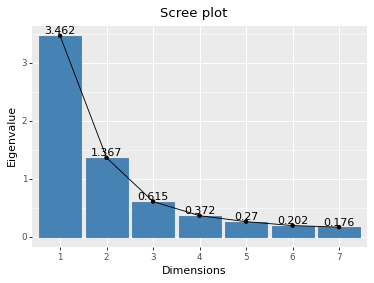

In [15]:
# Scree plot - eigenvalue
from scientisttools.ggplot import fviz_screeplot
p = fviz_screeplot(mfa,choice="eigenvalue",add_labels=True)
print(p)

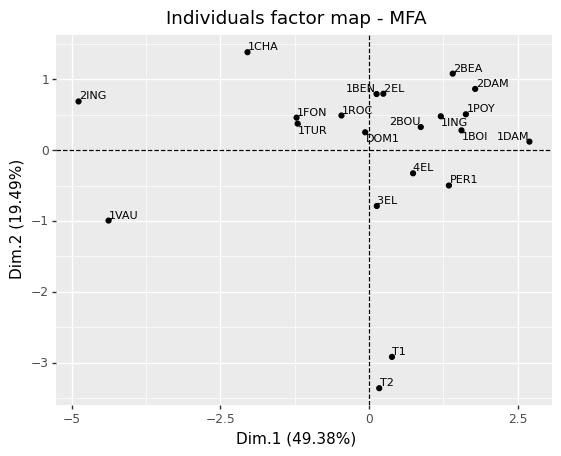

In [16]:
from scientisttools.ggplot import fviz_mfa_ind
p = fviz_mfa_ind(mfa,
                 repel=True,
                 color="black")
print(p)

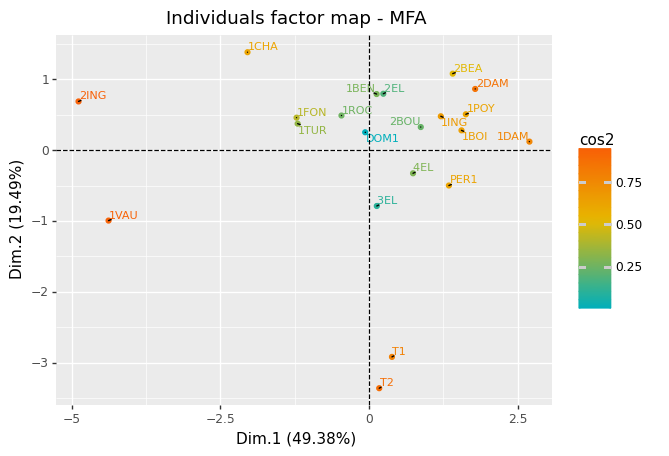

In [17]:
p = fviz_mfa_ind(mfa,
                 repel=True,
                 color="cos2",
                 gradient_cols=("#00AFBB", "#E7B800", "#FC4E07"))
print(p)

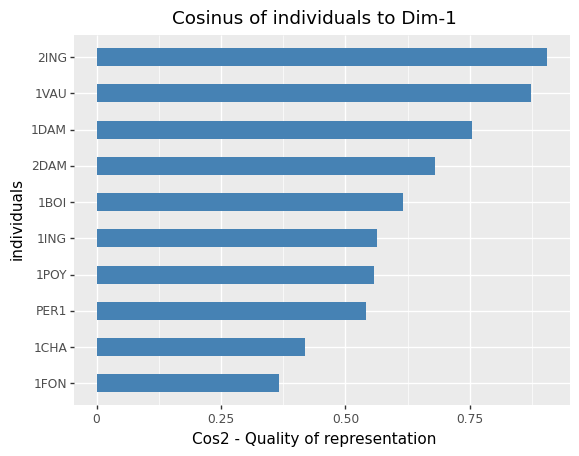

In [18]:
from scientisttools.ggplot import fviz_cosines
p = fviz_cosines(mfa,choice="ind",axis=0)
print(p)

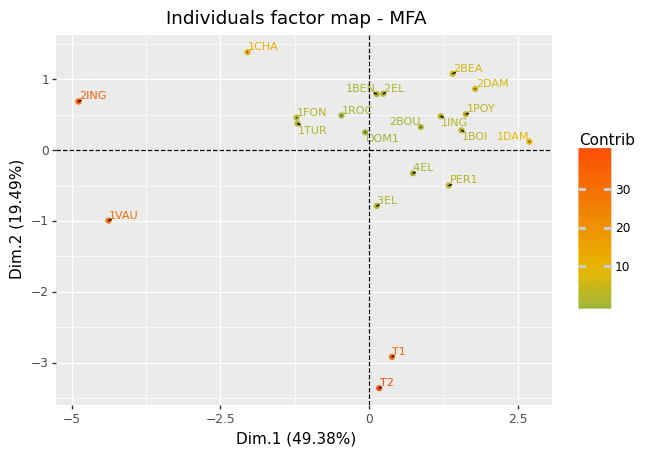

In [19]:
p = fviz_mfa_ind(mfa,
                 repel=True,
                 color="contrib",
                 gradient_cols=("#00AFBB", "#E7B800", "#FC4E07"))
print(p)

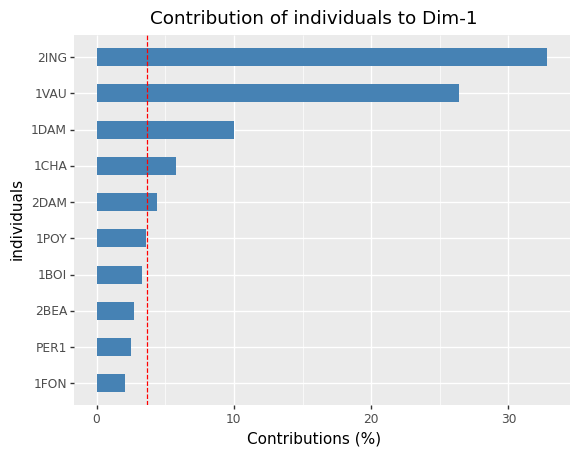

In [20]:
from scientisttools.ggplot import fviz_contrib
p = fviz_contrib(mfa,choice="ind",axis=0)
print(p)

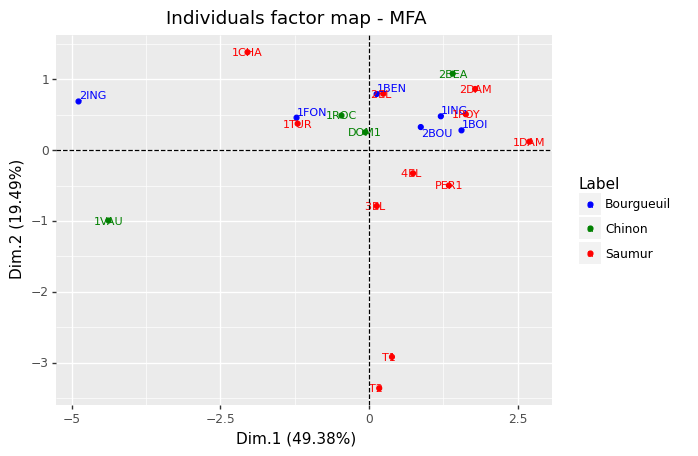

In [21]:
p = fviz_mfa_ind(mfa,
                 repel=True,
                 habillage="Label", # color by groups 
                 palette = ("blue", "green", "red"),
                 add_ellipse=False)
print(p)

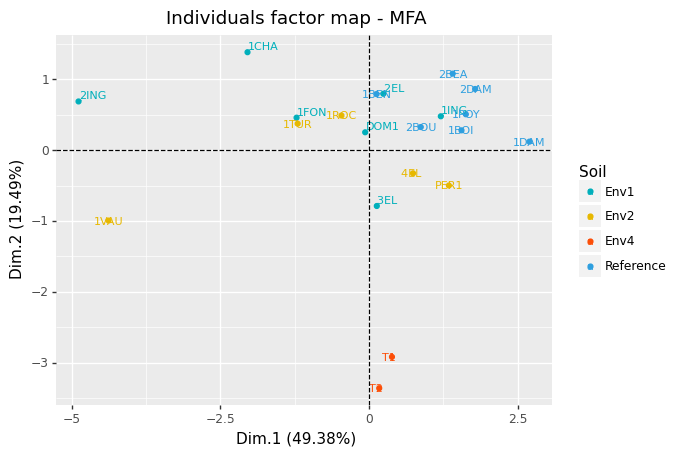

In [22]:
p = fviz_mfa_ind(mfa,
                 repel=True,
                 habillage="Soil", # color by groups 
                 palette = ("#00AFBB", "#E7B800", "#FC4E07","#2E9FDF"),
                 add_ellipse=False)
print(p)

In [23]:
from scientisttools.extractfactor import summaryMFA
summaryMFA(mfa,to_markdown=False)

                     Multiple Factor Analysis - Results                     

Importance of components
                          Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6  \
Variance                  3.462   1.367   0.615   0.372   0.270   0.202   
Difference                2.095   0.751   0.243   0.102   0.068   0.027   
% of var.                49.378  19.494   8.778   5.309   3.857   2.887   
Cumulative of % of var.  49.378  68.873  77.651  82.960  86.816  89.703   

                          Dim.7  
Variance                  0.176  
Difference                0.050  
% of var.                 2.506  
Cumulative of % of var.  92.209  

Individuals (the 10 first)

      Dim.1  Dim.2  Dim.3
2EL   0.239  0.797 -0.936
1CHA -2.045  1.383 -1.514
1FON -1.220  0.459 -0.062
1VAU -4.381 -0.995  0.033
1DAM  2.696  0.120  0.690
2BOU  0.869  0.326 -0.391
1BOI  1.553  0.280  0.414
3EL   0.129 -0.789 -1.858
DOM1 -0.066  0.253  0.459
1TUR -1.202  0.375  0.716


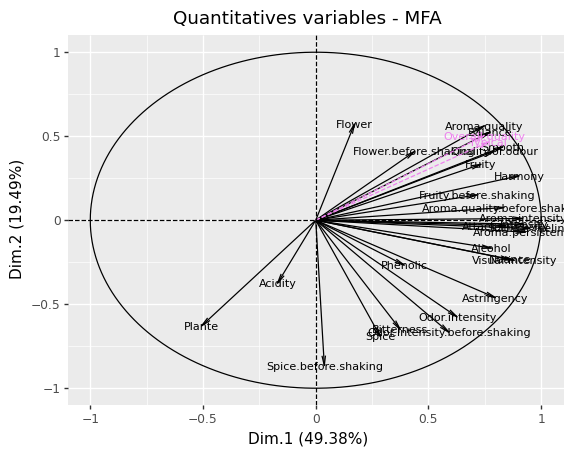

In [24]:
from scientisttools.ggplot import fviz_mfa_col
p = fviz_mfa_col(mfa,color="black",color_sup="violet")
print(p)

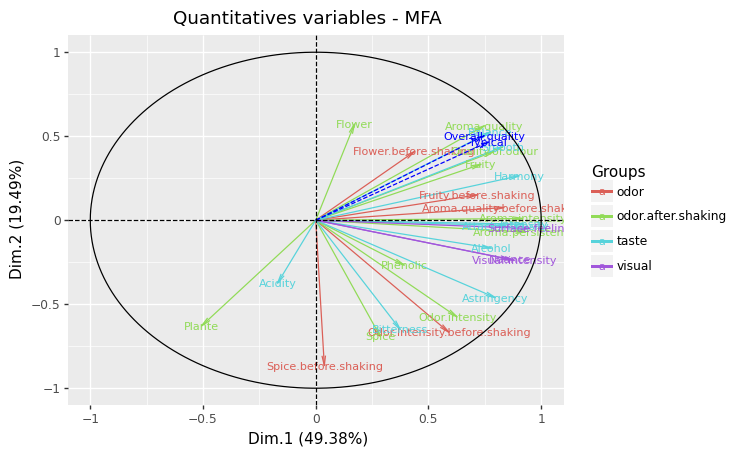

In [25]:
p = fviz_mfa_col(mfa,color="group",color_sup="blue")
print(p)

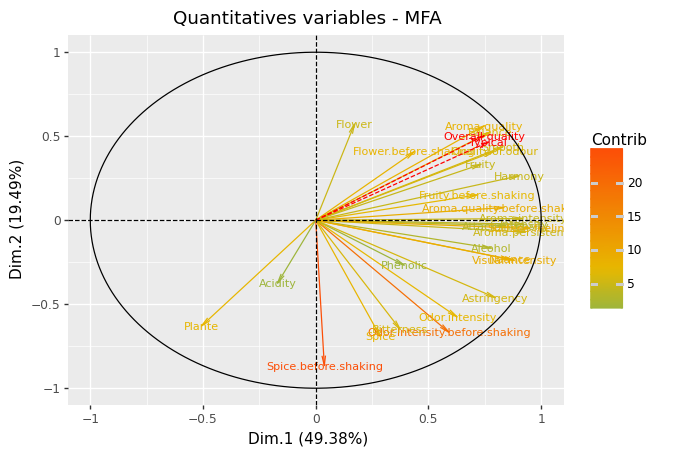

In [26]:
p = fviz_mfa_col(mfa,color="contrib",gradient_cols=("#00AFBB","#E7B800", "#FC4E07"))
print(p)

C:\Users\duver\AppData\Roaming\Python\Python310\site-packages\plotnine\guides\guides.py:187: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


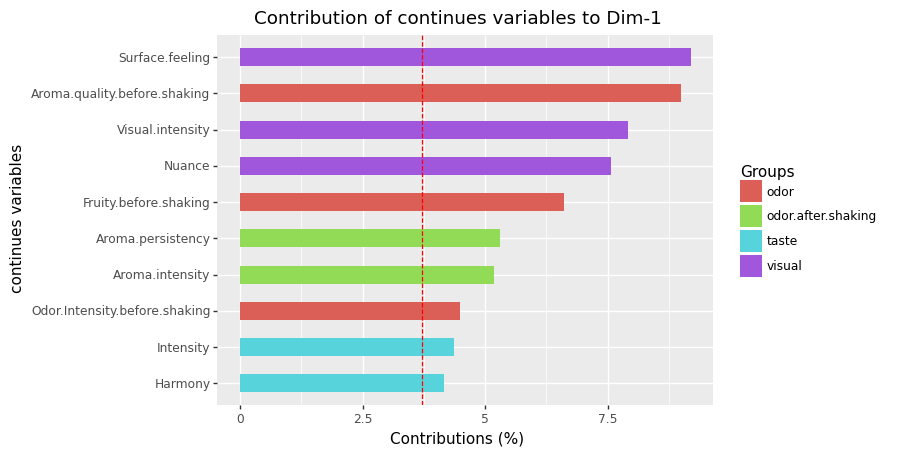

In [32]:
p = fviz_contrib(mfa,choice="var",axis=0,palette=None)
print(p)

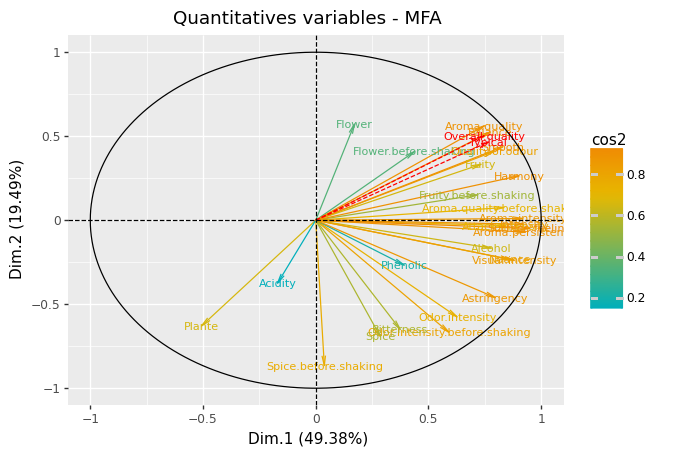

In [28]:
p = fviz_mfa_col(mfa,color="cos2",gradient_cols=("#00AFBB","#E7B800","#FC4E07"))
print(p)

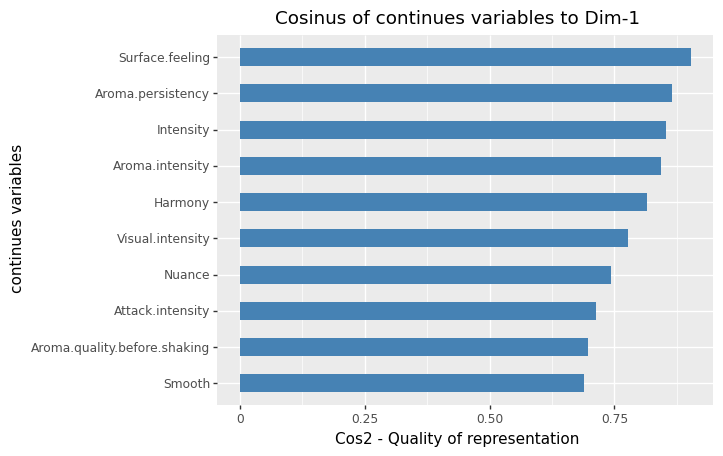

In [29]:
p = fviz_cosines(mfa,choice="var",axis=0)
print(p)

## Groups

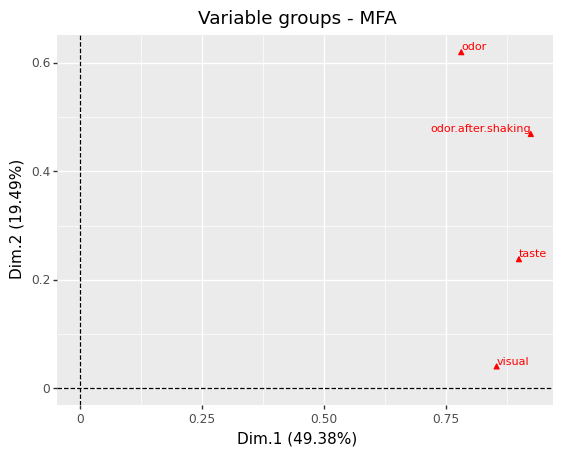

In [30]:
from scientisttools.ggplot import fviz_mfa_group
p = fviz_mfa_group(mfa,group_sup=False,repel=True,marker="^")
print(p)